In [9]:
import aco
from datetime import datetime, timedelta
import IPython
from matplotlib import pyplot as plt

import numpy as np
import scipy.signal as signal


%matplotlib inline 
# notebook



In [2]:
snap = src[
    timedelta(minutes=2, seconds=40):
    timedelta(minutes=2, seconds=45)]


In [3]:
parms = dict(frame_duration=.025, frame_shift=.025*.75)

/home/probinso/git/Whales/code/aco.py:175: UserWarning: Only 0.058 of signal represented
  warnings.warn(f'Only {fs_ratio:.3f} of signal represented', UserWarning)


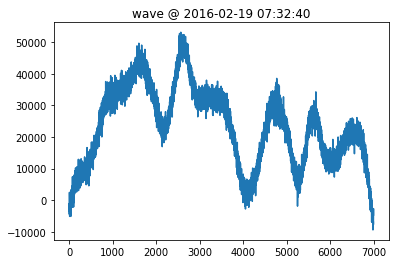

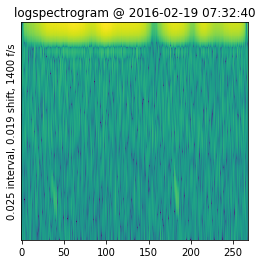

In [4]:
down = snap.resample(n=7000)
down.View()
down.View('logspectrogram', **parms)
down.Listen()

INFO:PyEMD.EMD:Max iterations reached for IMF. Continueing with another IMF.


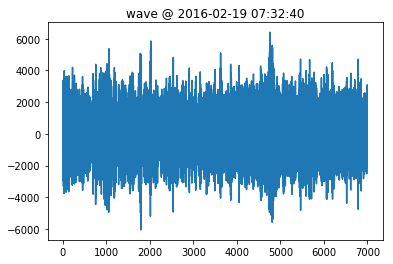

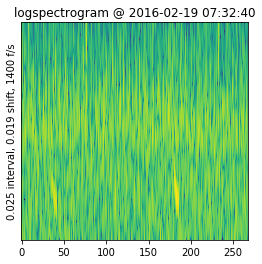

In [5]:
centered = down.remove_dc(levels=2)
centered.View()
centered.View('logspectrogram', **parms)
centered.Listen()

In [15]:
noise = centered[timedelta(seconds=1):timedelta(seconds=3)]
noise.Listen()

(129,)

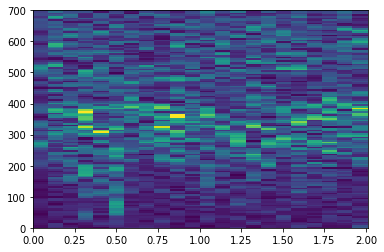

In [16]:
fig = plt.figure()
signal.correlate(noise._data, noise._data, 'same')
f, t, Zxx = signal.stft(noise._data, noise._fs)
_ = plt.pcolormesh(t, f, np.abs(Zxx))
sub = Zxx.mean(axis=1)
sub.shape

In [17]:
f, t, Zxx = signal.stft(centered._data, centered._fs)
i, a = np.abs(Zxx).min(), np.abs(Zxx).max()

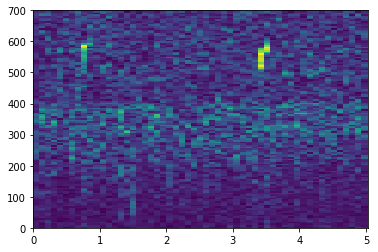

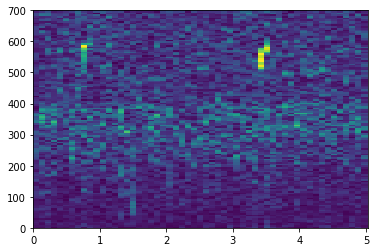

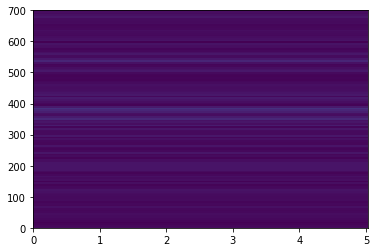

In [18]:
fig = plt.figure()
_ = plt.pcolormesh(t, f, np.abs(Zxx), vmin=i, vmax=a)

fig = plt.figure()
newspec = (Zxx.T - sub).T
_ = plt.pcolormesh(t, f, np.abs(newspec), vmin=i, vmax=a)

fig = plt.figure()
diff = Zxx - newspec
_ = plt.pcolormesh(t, f, np.abs(diff), vmin=i, vmax=a)

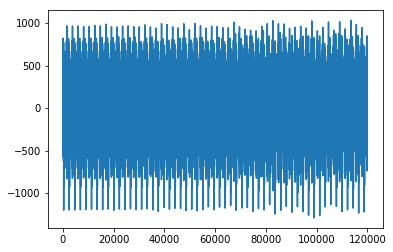

In [33]:
_, x = signal.istft(newspec, fs=centered._fs)

fs = 24000
fs_ratio = fs/centered._fs
A = signal.resample(x, int(np.round(len(x)*fs_ratio)))
B = centered._resample_fs(fs)
size = min(len(A), len(B))

from IPython.display import Audio
display(Audio(data=A[:size], rate=fs))
display(Audio(data=B[:size], rate=fs))
display(plt.plot(A[:size]-B[:size]))

In [11]:
p_s_w = centered.spectrogram(**parms).data
p_n_w = noise.spectrogram(**parms).data

In [12]:
p_n_w.shape, p_s_w.shape

((107, 65), (268, 257))

In [13]:
import scipy.signal as signal

x = signal.welch(centered._data, window=noise._data, scaling='spectrum')[1] * noise._data.sum() ** 2
